Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as ply
import seaborn as sns

Reading csv file

In [2]:
df = pd.read_csv('../data/customer_segmentation.csv')

Displaying first few rows of dataset

In [3]:
df.head()

,customer_id,age,gender,city,account_age_days,total_orders,total_items_sold,total_items_bought,avg_order_value,total_spend,total_earnings,preferred_category,payment_method,return_rate_percent,last_purchase_days_ago,seller_rating_avg,buyer_rating_avg,is_active_user,avg_delivery_days,discount_usage_percent
0,CUST200000,22.0,Other,Chennai,1607,36,199,235,6554.68,119220.48,317832.03,Furniture,Wallet,3.64,21,2.94,3.14,1,3.0,47.78
1,CUST200001,43.0,Other,Hyderabad,259,34,53,182,16574.06,553373.86,137265.06,Sports,COD,33.54,73,3.25,2.22,1,4.0,14.02
2,CUST200002,NaN,Other,Hyderabad,1111,141,248,61,14378.53,NaN,206200.00,NaN,Wallet,37.40,257,2.81,3.61,1,1.0,55.54
3,CUST200003,37.0,Other,Kolkata,1869,110,194,349,19386.89,85615.65,86447.90,Automobile,Debit Card,13.53,52,3.82,2.30,1,7.0,17.35
4,CUST200004,41.0,Other,NaN,2607,136,243,98,14853.60,700671.16,378772.75,Sports,NaN,43.98,243,4.49,2.73,1,6.0,43.15


In [4]:
df.shape

(15000, 20)

Calculation of statistical measures

In [ ]:
df.describe()

Checing for missing values

In [ ]:
df.isna().sum()

In [5]:
df1 = df.dropna()

In [ ]:
df1.isna().sum()

In [ ]:
df1.nunique()

In [ ]:
df1['preferred_category'].nunique()

Visualization of preferred category of products

In [ ]:
df1['preferred_category'].value_counts()

<Axes: xlabel='preferred_category'>

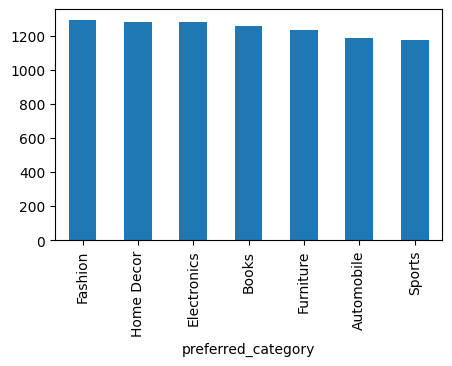

In [6]:
from matplotlib import pyplot as plt


plt.figure(figsize=(5,3))
df1['preferred_category'].value_counts().plot(kind='bar')

Analysing Gender

<Axes: title={'center': 'Gender Ratio'}>

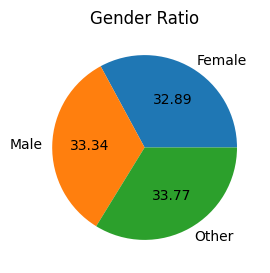

In [7]:

df1.groupby('gender').size().plot(kind='pie', autopct='%.2f', title='Gender Ratio', figsize=(3, 3))

<Axes: xlabel='gender'>

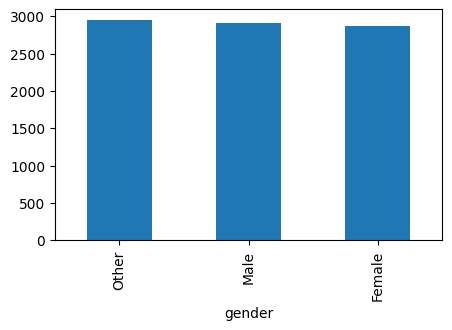

In [8]:
from matplotlib import pyplot as plt


plt.figure(figsize=(5,3))
df1['gender'].value_counts().plot(kind='bar')

In [ ]:
df.groupby('gender').size()

In [9]:
import pandas as pd
import numpy as np

# Define bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# Create age_group column
df1['age_group'] = pd.cut(
    df1['age'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)


C:\Users\HPP\AppData\Local\Temp\ipykernel_26044\2036890444.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_group'] = pd.cut(


In [10]:
df1.groupby('age_group').size()

C:\Users\HPP\AppData\Local\Temp\ipykernel_26044\1414241857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('age_group').size()


age_group
1-10        0
11-20     540
21-30    1890
31-40    1865
41-50    1812
51-60    1836
61-70     777
dtype: int64

C:\Users\HPP\AppData\Local\Temp\ipykernel_26044\3125162176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('age_group').size().plot(kind = 'bar', figsize = (5,3), title = 'Purchase Distribution by Age')


<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='age_group'>

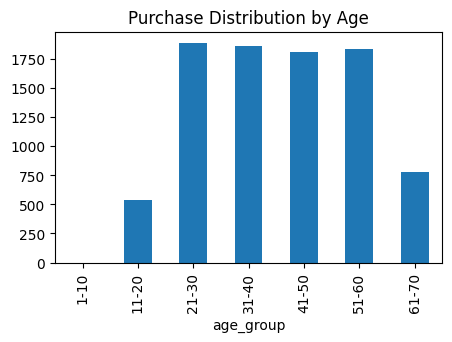

In [11]:
df1.groupby('age_group').size().plot(kind = 'bar', figsize = (5,3), title = 'Purchase Distribution by Age')



TOtal spending vs Total earning

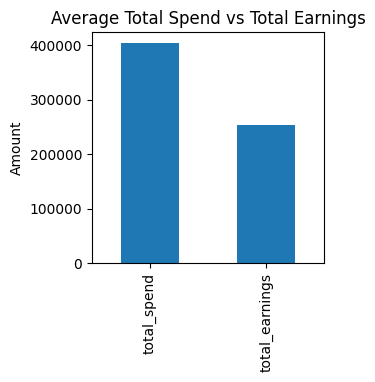

In [12]:
from matplotlib import pyplot as plt

plt.figure(figsize=(3, 3))
df1[['total_spend', 'total_earnings']].mean().plot(kind='bar')
plt.ylabel('Amount')
plt.title('Average Total Spend vs Total Earnings')
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df1['total_spend'], df1['total_earnings'], alpha=0.5)
plt.xlabel('Total Spend')
plt.ylabel('Total Earnings')
plt.title('Total Spend vs Total Earnings')
plt.show()


Total Spenf Distribution

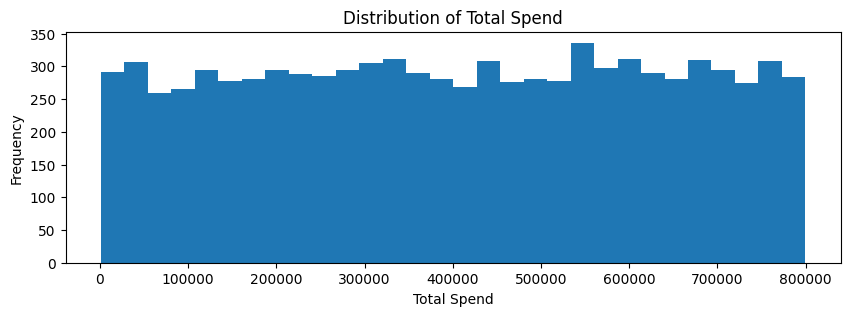

In [13]:
plt.figure(figsize=(10,3))
plt.hist(df1['total_spend'], bins=30)
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Distribution of Total Spend')
plt.show()


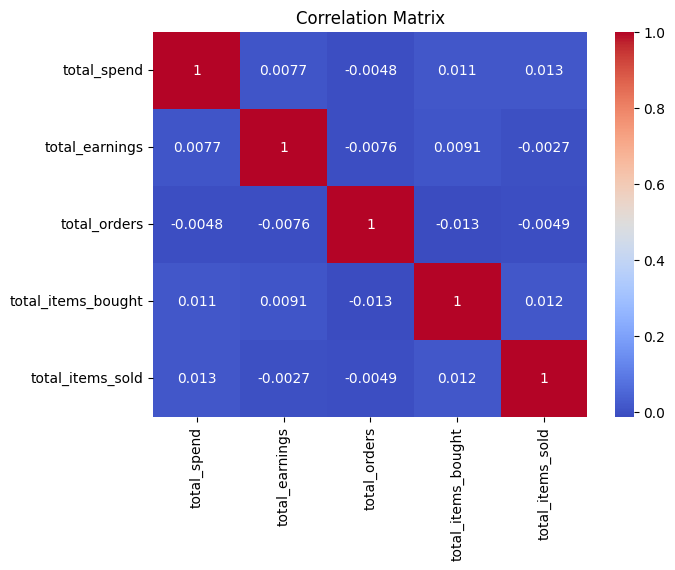

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(
    df1[['total_spend','total_earnings','total_orders',
         'total_items_bought','total_items_sold']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Matrix')
plt.show()


Customer Segmentation


In [15]:
def customer_segment(row):
    if row['total_spend'] >= 300000 and row['total_orders'] >= 40:
        return 'High Value Customer'
    elif row['total_orders'] >= 25:
        return 'Frequent Buyer'
    elif row['last_purchase_days_ago'] >= 180:
        return 'Churn Risk'
    else:
        return 'Regular Customer'

df1['customer_segment'] = df1.apply(customer_segment, axis=1)


C:\Users\HPP\AppData\Local\Temp\ipykernel_26044\1656288865.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['customer_segment'] = df1.apply(customer_segment, axis=1)


Segment Analysis

In [16]:
df1.groupby('customer_segment')[[
    'total_spend',
    'total_orders',
    'total_earnings'
]].mean()


,total_spend,total_orders,total_earnings
customer_segment,,,
Churn Risk,404898.332232,12.697350,260681.194059
Frequent Buyer,223739.672995,77.767428,252461.471041
High Value Customer,551131.844898,94.450000,253857.035114
Regular Customer,397031.556519,12.276504,252455.455186


Segment Visualization

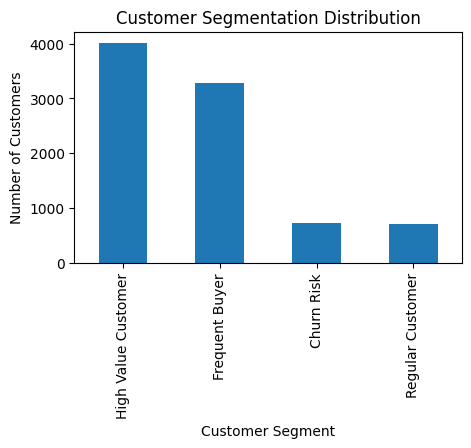

In [17]:

from matplotlib import pyplot as plt

plt.figure(figsize=(5,3))
df1['customer_segment'].value_counts().plot(kind='bar')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Distribution')
plt.show()


Average spend per segment

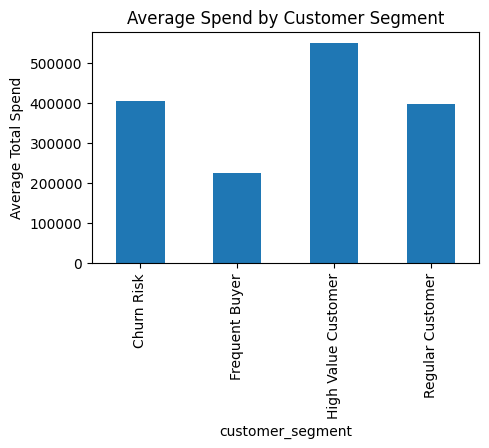

In [18]:
plt.figure(figsize=(5,3))
df1.groupby('customer_segment')['total_spend'].mean().plot(kind='bar')
plt.ylabel('Average Total Spend')
plt.title('Average Spend by Customer Segment')
plt.show()


Validate the segments

In [ ]:
df1['customer_segment'].value_counts()


Compare key metrices across segments

In [ ]:
segment_summary = df1.groupby('customer_segment')[[
    'total_spend',
    'total_orders',
    'total_earnings',
    'last_purchase_days_ago'
]].mean()

segment_summary


Visualization of customer count per segment

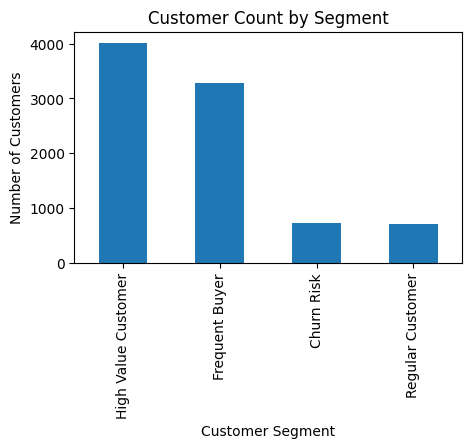

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,3))
df1['customer_segment'].value_counts().plot(kind='bar')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Segment')
plt.show()


Average spend per segment

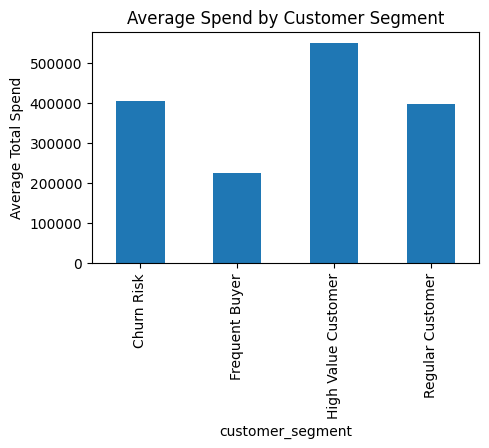

In [20]:
plt.figure(figsize=(5,3))
df1.groupby('customer_segment')['total_spend'].mean().plot(kind='bar')
plt.ylabel('Average Total Spend')
plt.title('Average Spend by Customer Segment')
plt.show()


Purchase vs selling behaviour by segments

In [ ]:
df1.groupby('customer_segment')[[
    'total_items_bought',
    'total_items_sold'
]].mean()
